In [2]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 16.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.8 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 7.6 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 6.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 5.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------------- -------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [25]:
def HandleRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(HandleRate)

print(dataframe.head())

dataframe.head()



                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [42]:
# diff_type = dataframe.groupby('listed_in(type)')['votes'].sum()

# total_vote = dataframe['votes'].sum()
# print(total_vote)

# print(diff_type)

t = dataframe['listed_in(type)'].value_counts() ## kisi ek perticular k diff-diff element ka count nikalne k liye use karte h 
print(t)

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

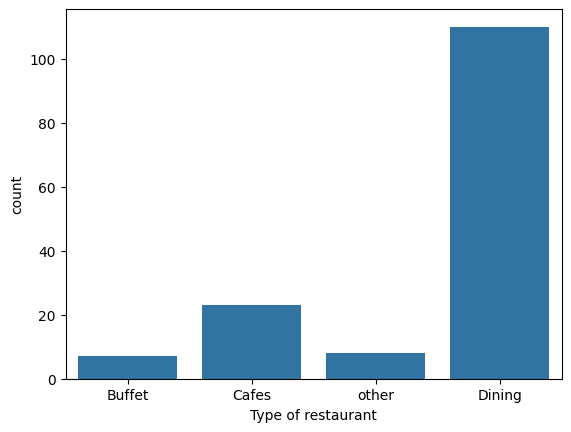

In [19]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64
                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


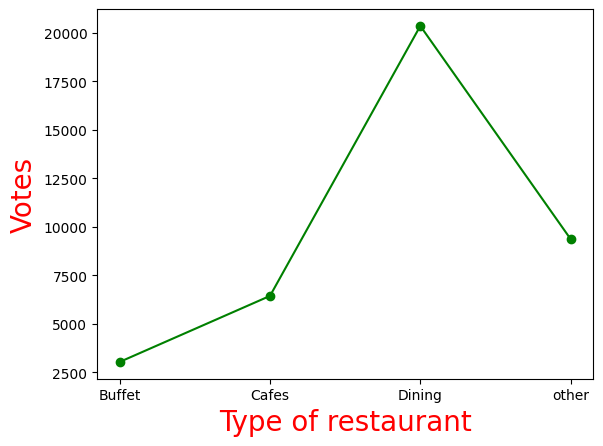

In [43]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

print(grouped_data)

print(result)

In [50]:
max_votes = dataframe['listed_in(type)'].max()

restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print(restaurant_with_max_votes)

Series([], Name: name, dtype: object)


<Axes: xlabel='online_order', ylabel='count'>

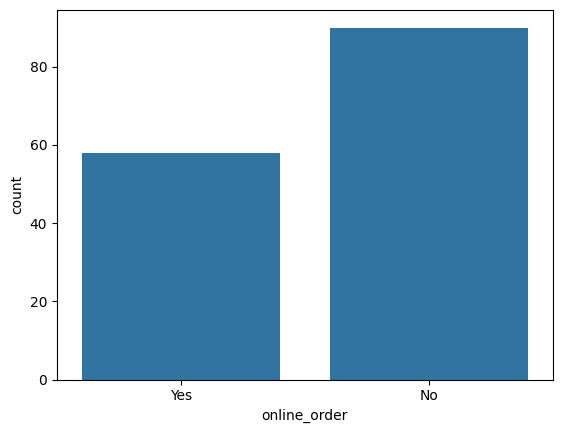

In [55]:
sns.countplot(x=dataframe['online_order'])

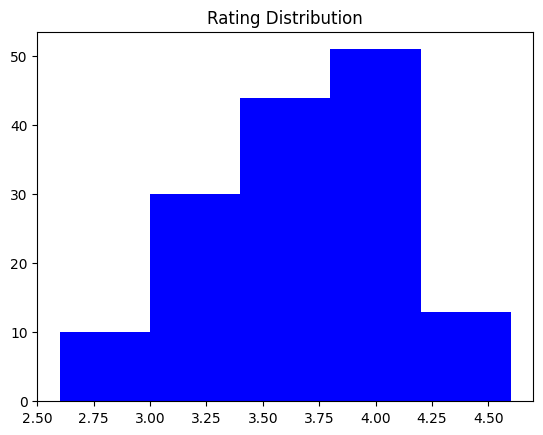

In [60]:
plt.hist(dataframe['rate'], bins = 5, color = 'b')
plt.title('Rating Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

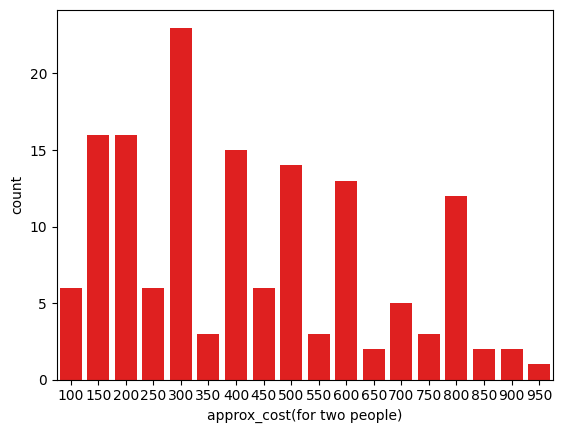

In [64]:
couple_data = dataframe['approx_cost(for two people)']

sns.countplot(x=couple_data,color='r')

<Axes: xlabel='online_order', ylabel='rate'>

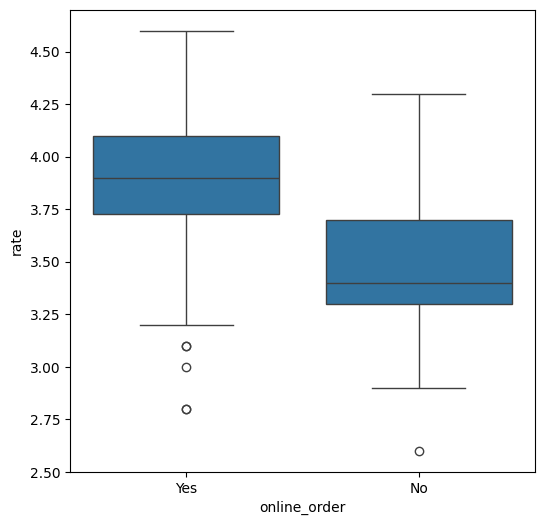

In [66]:
plt.figure(figsize = (6,6))

sns.boxplot(x='online_order', y= 'rate', data = dataframe)

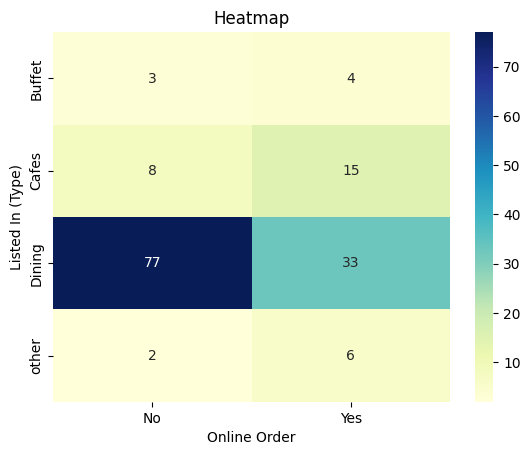

In [67]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()